# DS-SF-25 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [8]:
# TODO
df.count()
df.admit.unique()
df.admit.count()

400

Answer: 400

> ### Question 2.  Create a summary table.

In [10]:
# TODO

df.describe()

/Users/libbyalthea/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [13]:
# TODO
print df.gre.std()
print df.gpa.std()

115.628513092
0.380630380057


Answer: The values of gre are much larger and have a higher distribution than gpa

> ### Question 4.  Drop data points with missing data.

In [18]:
# TODO
df=df[pd.notnull(df['gre'])]
df=df[pd.notnull(df['gpa'])]
df=df[pd.notnull(df['prestige'])]

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [19]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: There are no more NaN entries in the describe table
I could also double check the unique values of the different variables to make sure NaN no longer exists

> ### Question 6.  Create boxplots for `gre` and `gpa`.

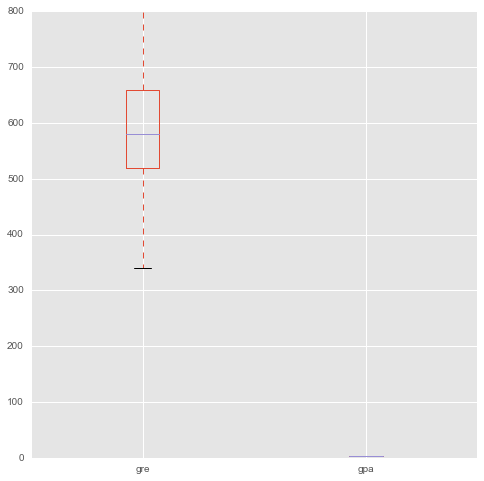

In [20]:
# TODO
df[ ['gre', 'gpa'] ].plot(kind = 'box', figsize = (8, 8))

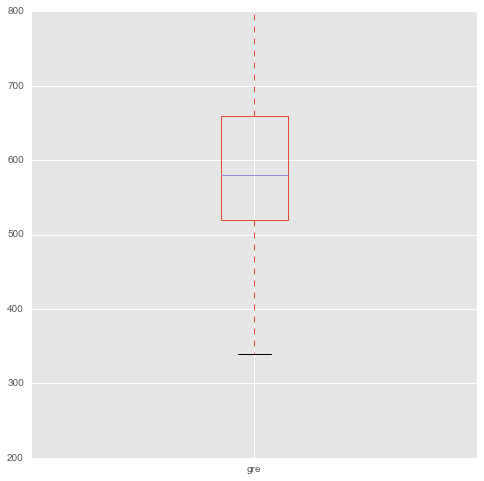

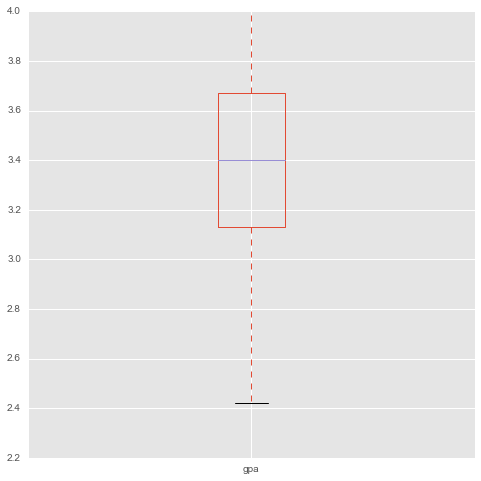

In [22]:
df[ ['gre'] ].plot(kind = 'box', figsize = (8, 8))
df[ ['gpa'] ].plot(kind = 'box', figsize = (8, 8))

> ### Question 7.  What do boxplots show?

Answer:

No outliers for either gpa or gre
Fairly even distribution, though gpa has a slight left long tail/ right skew

> ### Question 8.  Plot the distribution of each variable.

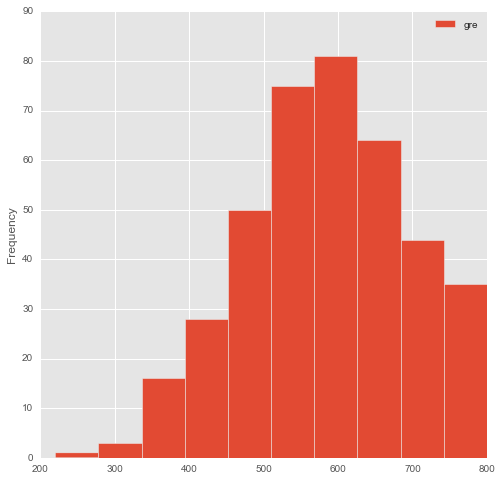

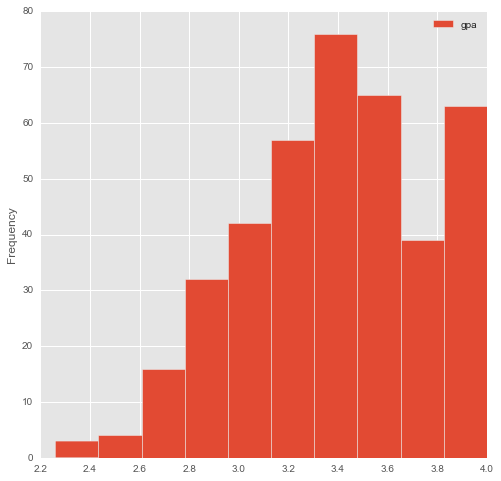

In [25]:
# TODO
df[ ['gre'] ].plot(kind = 'hist', figsize = (8, 8))
df[ ['gpa'] ].plot(kind = 'hist', figsize = (8, 8))

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [ ]:
# TODO



Answer: GPA does not seem to have a normal distribution, with the right skew

> ### Question 10.  Create a correlation matrix for the dataset

In [26]:
# TODO

corr = df.corr()

corr

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: GPA and GRE have the strongest (posistive) correlation
Prestige and admit are also negatively correlated, although the correlation is not as strong as that between GPA and GRE

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: I would want to look at the admitance of similar students based on prestige. Since there is also slight negative correlation between prestige and gpa/gre, I would want to explore which variable is most impacting admission. I would look at the distribution of gre/gpa by prestige tier. I would then create a linear regression model and analyze the coefficients. 

> ### Question 13.  What is your hypothesis?

Answer: My hypothesis is that more prestigous schools have tougher gpa standards which may be a driving factor in the negative correlation seen between prestige and admission. 